<a href="https://colab.research.google.com/github/akshaynathr/ML-with-Tensorflow/blob/master/Basics_of_TensorFlow_and_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf

print(tf.__version__)

hello = tf.constant('Hello')


1.13.1


In [3]:
a = tf.constant(10)
b = tf.constant(20)
a+ b

<tf.Tensor 'add:0' shape=() dtype=int32>

In [0]:
with tf.Session() as sess:
  result = sess.run(a+b)

In [5]:
result


30

In [0]:
fill_mat = tf.fill((4,4),10)

myzeros = tf.zeros((4,4))

myones = tf.ones((4,4))

In [0]:
myrandn = tf.random_normal((4,4),mean=0, stddev=1)

In [0]:
myrandu = tf.random_uniform((4,4),minval=0,maxval=1)

In [0]:
const = tf.constant(10)
my_ops = [const,fill_mat,myzeros,myones,myrandu,myrandn]

In [10]:
sess = tf.InteractiveSession()

for op in my_ops:
  print(sess.run(op))

10
[[10 10 10 10]
 [10 10 10 10]
 [10 10 10 10]
 [10 10 10 10]]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]
[[0.16691577 0.6804801  0.7501068  0.20091021]
 [0.30516112 0.31373823 0.5162474  0.2819414 ]
 [0.48298144 0.9253359  0.23005784 0.04217553]
 [0.39700866 0.90223014 0.4624101  0.8464359 ]]
[[ 0.42151618  0.75393903 -0.6573005  -0.11031692]
 [-0.4206007  -0.36385518 -1.0602133   0.9304477 ]
 [-0.3046888  -0.15477017 -0.19028008 -0.7507784 ]
 [-1.4516343   1.3788091  -1.5331168  -0.1904129 ]]


MATRIX MULTIPLICATIOn

In [11]:
a = tf.constant([[1,2],[3,4]])
a.get_shape()

TensorShape([Dimension(2), Dimension(2)])

In [12]:
b= tf.constant([[10],[20]])
print(b.get_shape())

result = tf.matmul(a,b)

(2, 1)


In [13]:
sess.run(result)

array([[ 50],
       [110]], dtype=int32)

In [14]:
result


<tf.Tensor 'MatMul:0' shape=(2, 1) dtype=int32>

In [15]:
sess = tf.InteractiveSession()

mytensor = tf.random_uniform((4,4),0,1)

mytensor

/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


<tf.Tensor 'random_uniform_1:0' shape=(4, 4) dtype=float32>

In [16]:
myvar = tf.Variable(initial_value = mytensor)

Instructions for updating:
Colocations handled automatically by placer.


In [17]:
myvar

<tf.Variable 'Variable:0' shape=(4, 4) dtype=float32_ref>

In [18]:
print(myvar)

init = tf.global_variables_initializer()

init
#sess.run(init)


sess.run(myvar.initializer)
#sess.run(myvar)

var = tf.Variable(mytensor,'test_val')

t=sess.run(tf.report_uninitialized_variables())

print(t)
#sess.run(myvar)

<tf.Variable 'Variable:0' shape=(4, 4) dtype=float32_ref>
[b'Variable_1']


In [0]:
ph = tf.placeholder(tf.float32, shape=[None,4])

In [20]:
sess.run(ph)

InvalidArgumentError: ignored

In [0]:
import numpy as np
import pandas as pd
import matplotlib as plt
%matplotlib inline


In [0]:
x_data = np.linspace(0.0,10.0,1000000)

In [36]:
x_data

array([0.000000e+00, 1.000001e-05, 2.000002e-05, ..., 9.999980e+00,
       9.999990e+00, 1.000000e+01])

In [0]:
noise = np.random.randn(len(x_data))

In [38]:
noise

array([ 0.40344491, -0.04879182, -0.25221196, ...,  2.43557357,
       -0.7878743 ,  0.03024126])

In [0]:
y= mx + b
b=5


In [0]:
y_true = (.05* x_data)+ 5+ noise
import pandas as pd
import matplotlib as plt
%matplotlib inline

In [0]:
x_df = pd.DataFrame(data=x_data,columns=["X Data"])

In [0]:
y_df = pd.DataFrame(data=y_true, columns=["Y True"])

In [0]:
mydata =pd.concat([x_df,y_df],axis=1)

In [45]:
mydata.head()

,X Data,Y True
0,0.00000,5.403445
1,0.00001,4.951209
2,0.00002,4.747789
3,0.00003,4.291455
4,0.00004,6.195148


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


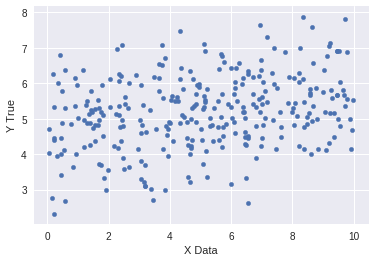

In [46]:
mydata.sample(n=300).plot(kind='scatter',x='X Data',y='Y True')

In [0]:
batch_size =10
m= tf.Variable(2.5)
b= tf.Variable(2.0)

x_ph = tf.placeholder(tf.float32,[batch_size])
y_ph = tf.placeholder(tf.float32,[batch_size])


In [0]:
y_model = m* x_ph + b
error = tf.reduce_sum(tf.square(y_ph- y_model))

In [0]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)

train = optimizer.minimize(error)

In [0]:
init = tf.global_variables_initializer()

In [0]:
import numpy as np
with tf.Session() as sess:
  sess.run(init)
  batches = 1000
  
  for i in range(batches):
    rand_index = np.random.randint(len(x_data),size = batch_size)
    feed = {x_ph: x_data[rand_index], y_ph:y_true[rand_index]}
    sess.run(train, feed_dict = feed)
    
  model_m, model_b = sess.run([m,b])

In [55]:
model_m

0.07310267

In [56]:
model_b

5.0052786

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


AttributeError: ignored

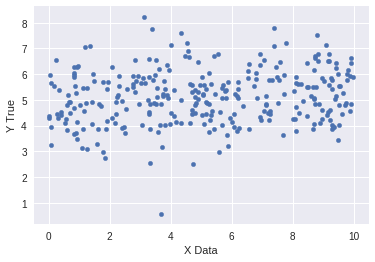

In [64]:
mydata.sample(300).plot(kind='scatter',x="X Data",y="Y True")

 